In [9]:
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

<IPython.core.display.Javascript object>

In [10]:
pwd

'C:\\Users\\HP\\OneDrive\\Data Schoolss\\Natural Lang Processing'

<IPython.core.display.Javascript object>

In [11]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<IPython.core.display.Javascript object>

In [12]:
train.head(6)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1


<IPython.core.display.Javascript object>

### EDA

Handling missing values straight from the last 

In [13]:
train.keyword.value_counts()[:5]

fatalities    45
deluge        42
armageddon    42
sinking       41
damage        41
Name: keyword, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
train.location.value_counts()[:5]

USA              104
New York          71
United States     50
London            45
Canada            29
Name: location, dtype: int64

<IPython.core.display.Javascript object>

Plotting the distribution of the target variable

In [15]:
Disasters = train[train.target == 1].shape[0]
Non_Disasters = train[train.target == 0].shape[0]

<IPython.core.display.Javascript object>

In [16]:
Disasters

3271

<IPython.core.display.Javascript object>

In [17]:
Non_Disasters

4342

<IPython.core.display.Javascript object>

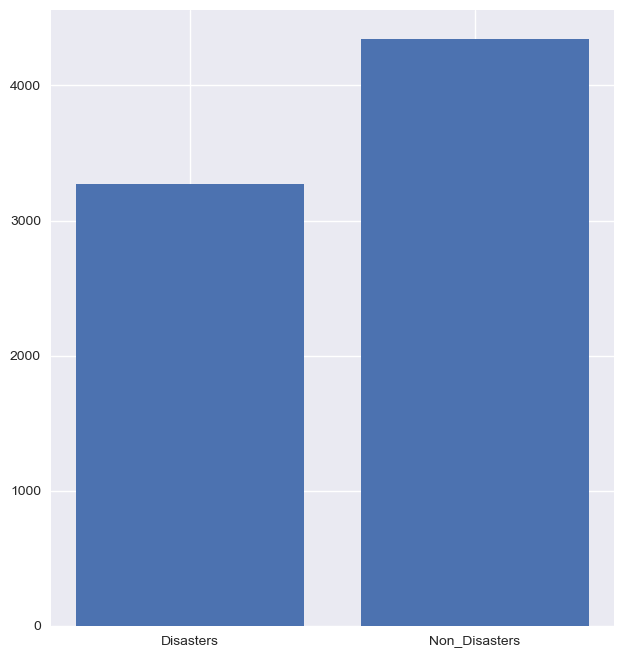

<IPython.core.display.Javascript object>

In [18]:
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
_ = plt.bar(["Disasters", "Non_Disasters"], [Disasters, Non_Disasters])

In [19]:
def plot_target_based_features(feature):
    x1 = train[train.target == 1][feature]
    x2 = train[train.target == 0][feature]
    plt.figure(1, figsize=(16, 8))
    plt.subplot(1, 1, 1)
    _ = plt.hist(x2, alpha=0.5, color="green", bins=50)
    _ = plt.hist(x1, alpha=0.7, color="red", bins=50)

    return _

<IPython.core.display.Javascript object>

Check the number of characters in the test feature

In [20]:
train.text.map(lambda x: len(x))

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 7613, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
train["text_len"] = train.text.map(lambda x: len(x))

<IPython.core.display.Javascript object>

In [22]:
train.head(4)

,id,keyword,location,text,target,text_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65


<IPython.core.display.Javascript object>

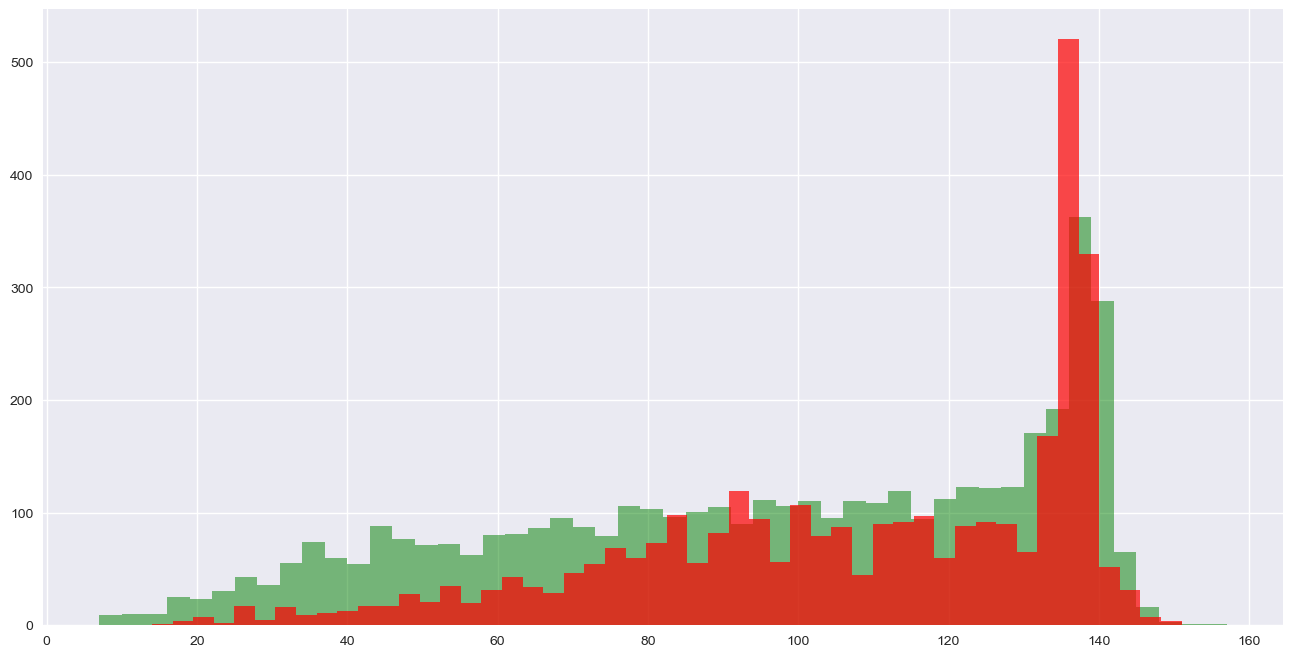

<IPython.core.display.Javascript object>

In [23]:
_ = plot_target_based_features("text_len")

Check the number of words in the text feature

In [24]:
train["words_count"] = train.text.str.split().map(lambda x: len(x))

<IPython.core.display.Javascript object>

In [25]:
train.head(4)

,id,keyword,location,text,target,text_len,words_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8


<IPython.core.display.Javascript object>

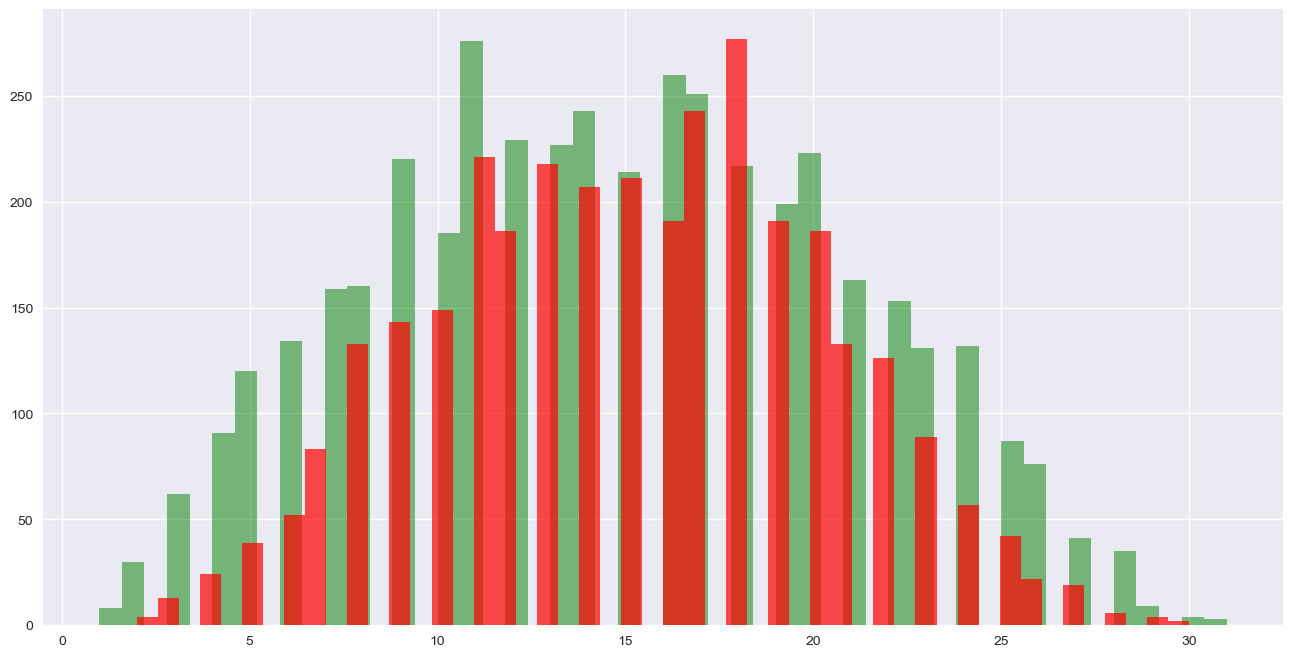

<IPython.core.display.Javascript object>

In [26]:
_ = plot_target_based_features("words_count")

Count the number of unique words

In [27]:
train["unique_word_count"] = train.text.map(lambda x: len(set(str(x).split())))

<IPython.core.display.Javascript object>

In [28]:
train.head(5)

,id,keyword,location,text,target,text_len,words_count,unique_word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,20
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,15


<IPython.core.display.Javascript object>

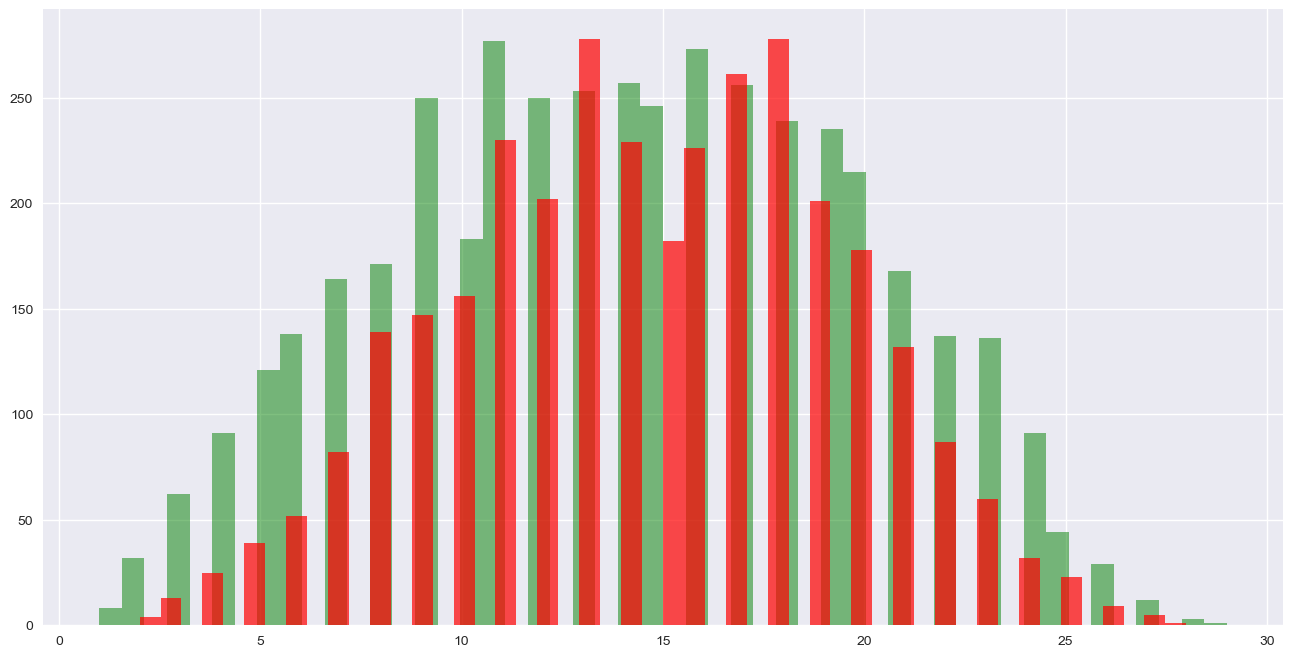

<IPython.core.display.Javascript object>

In [29]:
_ = plot_target_based_features("unique_word_count")

Mean word length 

In [30]:
train["mean_word_length"] = train.text.map(
    lambda x: np.mean([len(w) for w in str(x).split()]))



<IPython.core.display.Javascript object>

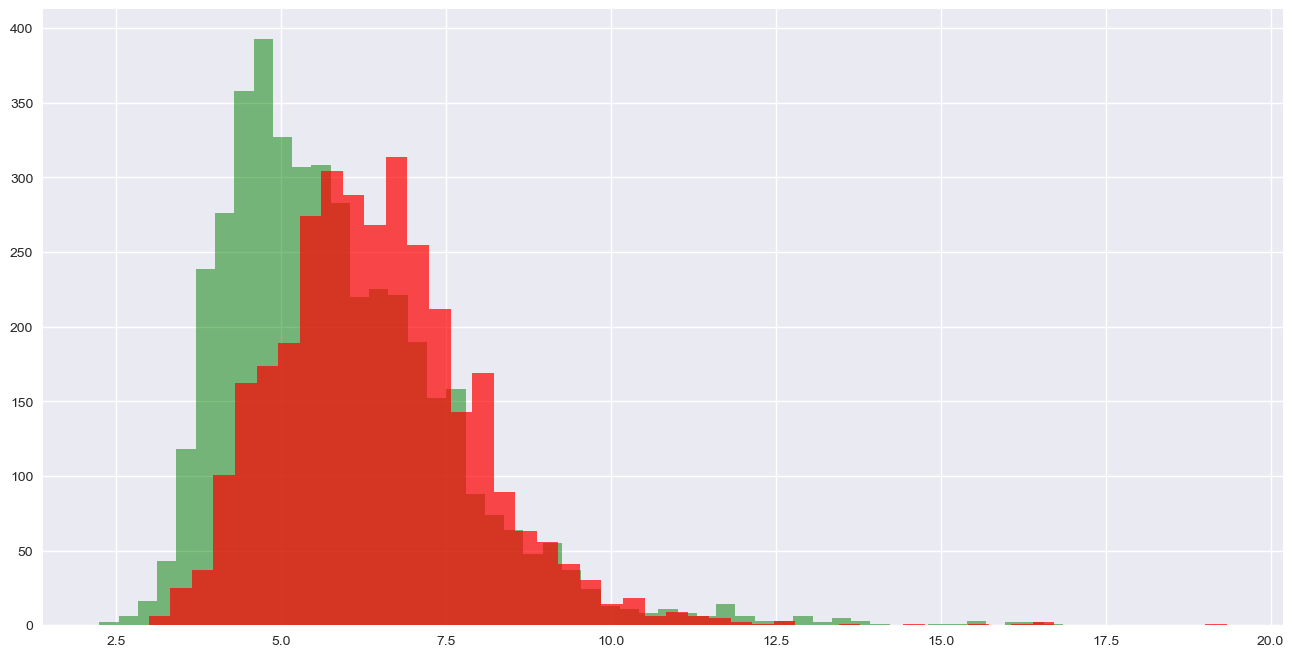

<IPython.core.display.Javascript object>

In [31]:
_ = plot_target_based_features("mean_word_length")

Puntuation count

In [32]:
import string

train["punctuation_count"] = train["text"].map(
    lambda x: len([c for c in str(x) if c in string.punctuation]))



<IPython.core.display.Javascript object>

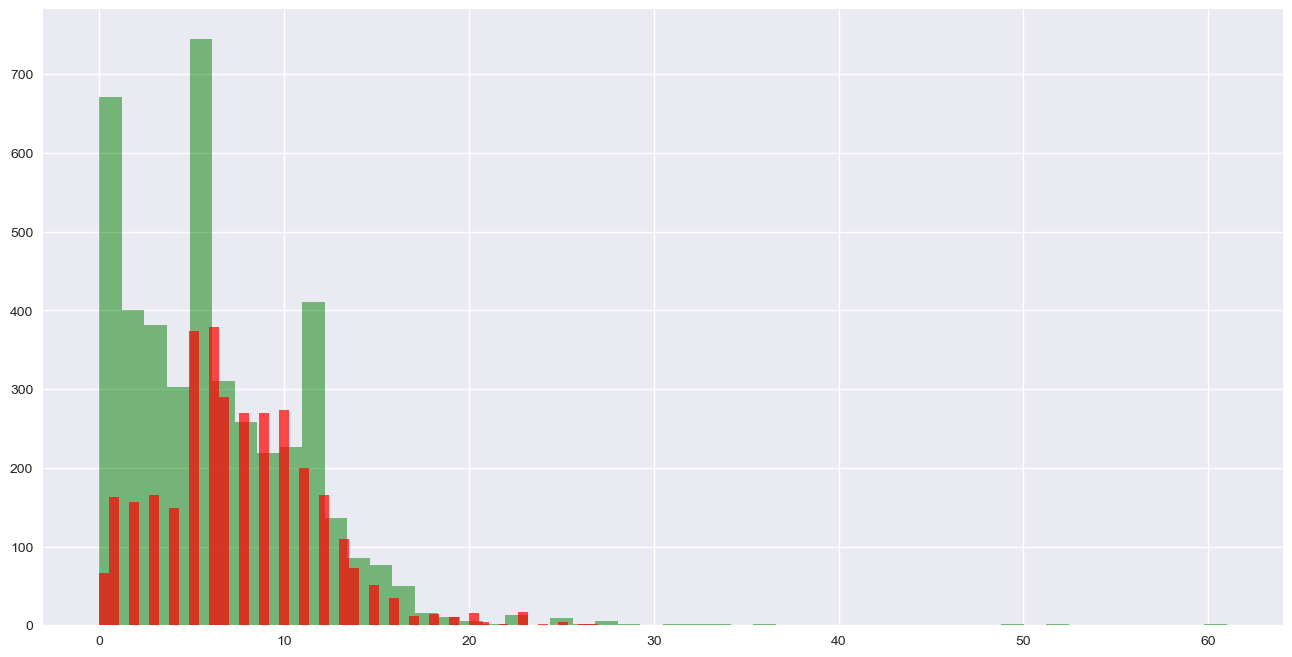

<IPython.core.display.Javascript object>

In [33]:
_ = plot_target_based_features("punctuation_count")